In [1]:
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

torch.manual_seed(10)

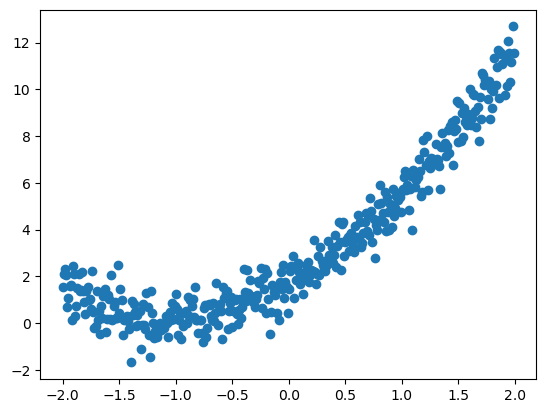

In [2]:
# Create parabolic data with noise

par   = [1.2, 2.6, 0.7]
start = -2
end   = 2
step  = 0.01


x     = torch.arange(start=start, end=end, step=step)
noise = np.random.normal(1,0.7,len(x))
y_real= par[0]*x**2 + par[1]*x + par[2]
y     = y_real + noise

plt.scatter(x,y)
plt.show()

In [3]:
# Create train and validation set

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)


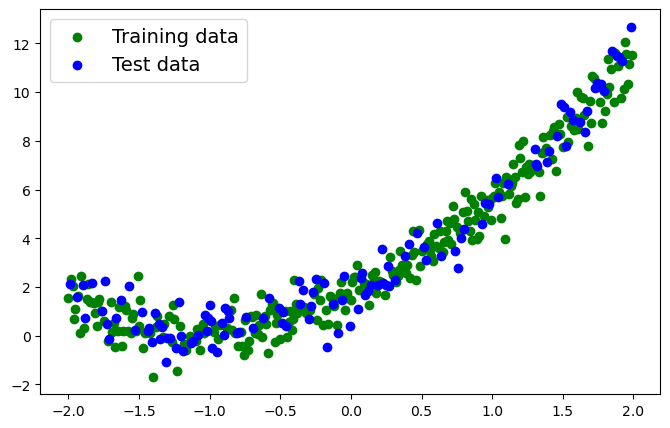

In [4]:
def plot_predictions(train_features= x_train,
                     train_labels  = y_train,
                     test_features = x_test,
                     test_labels   = y_test,
                     predictions   = None):
    plt.figure(figsize=(8,5))
    
    plt.scatter(train_features, train_labels, c="g", label="Training data")
    plt.scatter(test_features, test_labels, c="b", label="Test data")
    
    if predictions is not None:
        plt.scatter(test_features, predictions, c="r", label="Predictions")
    
    plt.legend(prop={"size" : 14})
    plt.show()
    
plot_predictions()


In [5]:
class QuadraticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.b = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.c = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.a * x**2 + self.b * x + self.c 

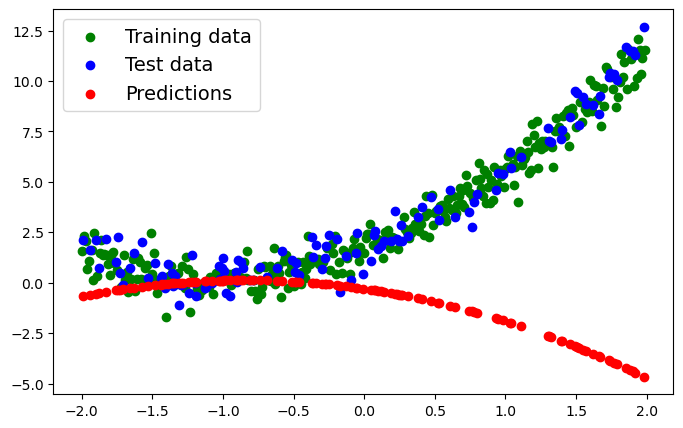

In [6]:
model = QuadraticRegressionModel()
with torch.inference_mode():
    y_pred = model(x_test)
    
plot_predictions(predictions=y_pred)

In [7]:
# Defining loss function

loss_func = torch.nn.MSELoss()
optimizer = optim.SGD(params=model.parameters(),
                      lr = 0.01)

In [8]:
epochs = 200 # Number of epochs

# Create empty loss lists to track values
train_loss_values = []
test_loss_values  = []
epoch_count       = []

# Loop on thennumber of epochs
for epoch in range (epochs):
    
    model.train()

    y_pred = model(x_train)
    
    loss = loss_func(y_pred.type(torch.float), y_train.type(torch.float))
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        
        test_pred = model(x_test)
        test_loss = loss_func(test_pred.type(torch.float), y_test.type(torch.float))
        
        if (epoch%10 == 0):
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            epoch_count.append(epoch)
        
            print(f"Epoch: {epoch}, Train MSE: {loss}, Test MSE: {test_loss}")

Epoch: 0, Train MSE: 42.54816436767578, Test MSE: 35.45432662963867
Epoch: 10, Train MSE: 15.741371154785156, Test MSE: 13.595627784729004
Epoch: 20, Train MSE: 7.5441765785217285, Test MSE: 6.712703227996826
Epoch: 30, Train MSE: 4.255962371826172, Test MSE: 3.8488261699676514
Epoch: 40, Train MSE: 2.634201765060425, Test MSE: 2.4038970470428467
Epoch: 50, Train MSE: 1.743411660194397, Test MSE: 1.6057279109954834
Epoch: 60, Train MSE: 1.2305916547775269, Test MSE: 1.1488853693008423
Epoch: 70, Train MSE: 0.9287960529327393, Test MSE: 0.8834545016288757
Epoch: 80, Train MSE: 0.7485689520835876, Test MSE: 0.7277128100395203
Epoch: 90, Train MSE: 0.6393486857414246, Test MSE: 0.6353435516357422
Epoch: 100, Train MSE: 0.571956217288971, Test MSE: 0.5797640085220337
Epoch: 110, Train MSE: 0.5294046401977539, Test MSE: 0.5456570982933044
Epoch: 120, Train MSE: 0.501758873462677, Test MSE: 0.5241817831993103
Epoch: 130, Train MSE: 0.48318028450012207, Test MSE: 0.5102241635322571
Epoch: 140

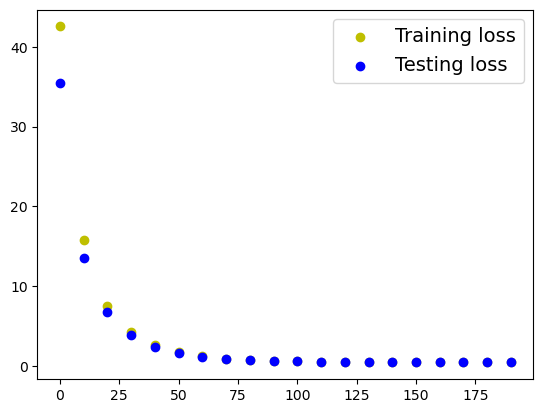

<Figure size 800x500 with 0 Axes>

In [9]:
plt.scatter(epoch_count, train_loss_values, c="y", label="Training loss")
plt.scatter(epoch_count, test_loss_values, c="b", label="Testing loss")
plt.legend(prop={"size":14})
plt.figure(figsize=(8,5))
plt.show()

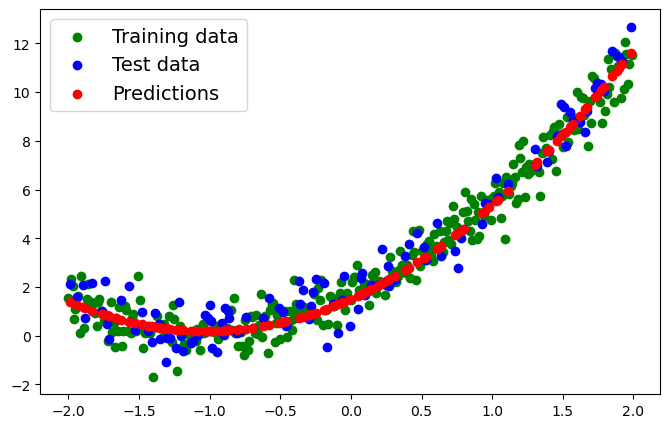

In [10]:
model.eval()
with torch.inference_mode():
    pred = model(x_test)
    plot_predictions(predictions=pred)
    